# Assignment 7: Pandas Fundamentals with Earthquake Data

In this assignment, we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Data for this assignment in .csv format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/).  You can search for your own earthquake catalog there, and choose to download in a .csv file format. If you'd prefer to skip making your own earthquake catalog file, one you can use is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

Note: You don't need to download this file. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [5]:
url="http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
data=pd.read_csv(url)
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

Verify that this worked using the `head` and `info` functions.


In [7]:
url="http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
catalog=pd.read_csv(url, parse_dates=[0,12])

catalog = catalog.set_index('id')

In [8]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

In [9]:
##print(catalog.time.iloc[0])
##print(catalog.time.iloc[1])
##tmp = catalog.time.iloc[0]-catalog.time.iloc[1]

catalog.index

Index(['ak11155107', 'nn00436847', 'ak11151142', 'ak11151135', 'ci37171541',
       'ci11419722', 'ci11419714', 'ak11151127', 'ak11151125', 'nc72153361',
       ...
       'usb000t1gp', 'ak11453414', 'usc000t6yn', 'ak11453410', 'ak11453411',
       'ak11453391', 'ak11453395', 'nc72358451', 'ak11453390', 'ak11453389'],
      dtype='object', name='id', length=120108)

### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [10]:
catalog.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [11]:
catalog1 = catalog.set_index('place')
catalog1.nlargest(20, 'mag', keep='all')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,type
place,,,,,,,,,,,,,
"94km NW of Iquique, Chile",2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223000+00:00,earthquake
"19km SE of Little Sitkin Island, Alaska",2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699000+00:00,earthquake
"53km SW of Iquique, Chile",2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755000+00:00,earthquake
"93km SSE of Kirakira, Solomon Islands",2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398000+00:00,earthquake
"70km SW of Panguna, Papua New Guinea",2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633000+00:00,earthquake
"112km S of Kirakira, Solomon Islands",2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018000+00:00,earthquake
"74km S of Intipuca, El Salvador",2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679000+00:00,earthquake
"33km ESE of Petatlan, Mexico",2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599000+00:00,earthquake
"56km WSW of Panguna, Papua New Guinea",2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01 02:37:56+00:00,earthquake


Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### 5) Extract the state or country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe called `country`. Note that some of the "countries" are actually U.S. states.

In [12]:
##url="http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
##data=pd.read_csv(url)
data["place"].str.split(",")

0         [26km S of Redoubt Volcano,  Alaska]
1                   [32km S of Alamo,  Nevada]
2          [12km NNW of North Nenana,  Alaska]
3                [22km S of Cantwell,  Alaska]
4              [10km WNW of Progreso,  Mexico]
                          ...                 
120103            [29km SW of Valdez,  Alaska]
120104     [102km SSE of Old Iliamna,  Alaska]
120105          [9km WNW of Cobb,  California]
120106             [57km NW of Ester,  Alaska]
120107          [78km WSW of Cordova,  Alaska]
Name: place, Length: 120108, dtype: object

In [13]:
data["country"] = data["place"].str.split(",").str.get(1)
data["country"]

0              Alaska
1              Nevada
2              Alaska
3              Alaska
4              Mexico
             ...     
120103         Alaska
120104         Alaska
120105     California
120106         Alaska
120107         Alaska
Name: country, Length: 120108, dtype: object

In [14]:
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,Alaska
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,California
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake,Alaska


### 6) Display each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [15]:
data["country"].unique()

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri', nan, ' Montana',
       ' British Virgin Islands', ' Washington', ' Oregon', ' Canada',
       ' Fiji', ' Antarctica', ' Chile', ' Utah', ' Indonesia',
       ' Solomon Islands', ' Micronesia', ' Oklahoma', ' Hawaii',
       ' Wyoming', ' Russia', ' Arizona', ' Philippines', ' Bolivia',
       ' Greece', ' Japan', ' Puerto Rico', ' Iran', ' Tonga',
       ' Wallis and Futuna', ' Colorado', ' Guam', ' CA', ' Idaho',
       ' Pakistan', ' Burma', ' China', ' Peru', ' Costa Rica',
       ' East Timor', ' Japan region', ' Northern Mariana Islands',
       ' El Salvador', ' Samoa', ' Taiwan', ' Arkansas',
       ' South Sandwich Islands', ' Colombia', ' Dominican Republic',
       ' Argentina', ' Texas', ' New Hampshire', ' Saint Helena',
       ' Tanzania', ' Vanuatu', ' Bosnia and Herzegovina', ' India',
       ' American Samoa', ' Tennessee', ' Kentucky', ' Serbia',
       ' Ni

### 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [16]:
newdata = data.loc[(data['mag'] >= 4)]
newdata

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
10,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,usc000mqlp,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
14,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,usc000mqln,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
16,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,usc000mqls,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,NaN
26,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,usc000mf1x,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
31,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,usc000mqlm,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120064,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,usc000t6yh,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
120077,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,usc000t6y2,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
120090,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,usc000t6y1,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines
120098,2014-12-01 00:40:02.720,37.2096,71.9458,95.57,4.2,mb,NaN,125.0,1.097,0.91,us,usb000t1gp,2015-02-24T00:35:14.040Z,"11km ESE of Roshtqal'a, Tajikistan",earthquake,Tajikistan


### 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

Location name on the x axis, Earthquake count on the y axis

country
 Indonesia           2112
 Papua New Guinea    1354
 Japan               1150
 Chile               1119
 New Zealand          758
Name: count, dtype: int64


<ipython-input-22-a61ed3fe94cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['count']=0


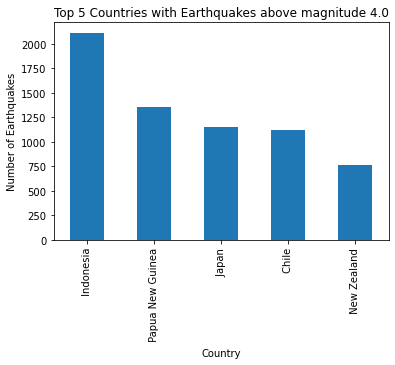

In [22]:
#newdata.plot.bar()
newdata['count']=0
grouped = newdata.groupby('country').count()
frequentEQs = grouped.nlargest(n=5, columns = 'count', keep = 'all')

final = frequentEQs['count']
print(final)

final.plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.title('Top 5 Countries with Earthquakes above magnitude 4.0')
plt.show()

### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

(array([9.235e+03, 6.060e+03, 1.455e+03, 5.010e+02, 1.730e+02, 8.400e+01,
        2.700e+01, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([4.  , 4.42, 4.84, 5.26, 5.68, 6.1 , 6.52, 6.94, 7.36, 7.78, 8.2 ]),
 <BarContainer object of 10 artists>)

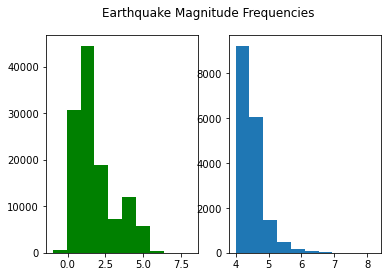

In [19]:
unfiltered = data['mag']
filtered = newdata['mag']
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Earthquake Magnitude Frequencies')
ax1.hist(unfiltered, color = 'g')
ax2.hist(filtered)

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

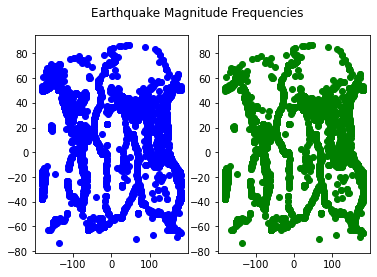

In [24]:
x, y = data['longitude'], data['latitude']
x_1, y_1 = newdata['longitude'], newdata['latitude']
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Earthquake Magnitude Frequencies')
ax1.scatter(x, y, color = 'b')
ax2.scatter(x_1, y_1, color = 'g')